In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


## Loading the final preprocessed trained dataset


In [2]:
#loading the train set
full_cleaned_final=pd.read_csv('full_cleaned_final.csv')
full_cleaned_final


,Unnamed: 0,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,688,0.533826,0.031109,0.000000,0.009478,0.000000,0.000000,Armenia,2000,1249.612148
1,1523,0.538633,0.009225,0.000000,0.008085,0.000000,0.000000,Honduras,2000,1768.251890
2,1580,0.537449,0.058739,0.000000,0.013793,0.000000,0.000000,North Macedonia,2000,3283.377863
3,2433,0.536683,0.276535,0.000000,0.000000,0.000000,0.000000,Kuwait,2000,31657.763247
4,2822,0.545600,0.031194,0.000000,0.005610,0.000000,0.000000,Uzbekistan,2000,1276.760315
...,...,...,...,...,...,...,...,...,...,...
3268,3018,0.549014,0.054865,0.187086,0.034744,0.004933,0.026811,Latvia,2021,16609.722783
3269,2339,0.538424,0.122299,0.253422,0.000124,0.607425,0.369096,Netherlands,2021,48301.528960
3270,3148,0.536683,0.026793,0.076001,0.000000,0.011490,0.000000,Guyana,2021,10857.338149
3271,1862,0.536683,0.000171,0.000000,0.000000,0.000000,0.000209,Chad,2021,595.663785


## Loading the test set

In [3]:
#Loading the test set
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv')
full_cleaned_final_test

,Unnamed: 0,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0,0.536683,0.013094,0.004868,0.005517,0.022927,0.006098,Sri Lanka,2021,4375.947708
1,1,0.489793,0.058209,0.010649,0.020071,0.091950,0.127282,Romania,2015,8976.880535
2,2,0.543022,0.054325,0.001869,0.016953,0.000000,0.022837,Turkey,2011,9207.542363
3,3,0.536683,0.007243,0.000000,0.001119,0.000000,0.000000,Sao Tome and Principe,2019,1676.396313
4,4,0.531945,0.038781,0.000481,0.016332,0.000000,0.000318,Turkey,2004,7112.514571
...,...,...,...,...,...,...,...,...,...,...
814,814,0.536683,0.001870,0.000000,0.000000,0.000000,0.000000,Gambia,2005,661.322036
815,815,0.536683,0.031996,0.000000,0.000000,0.000000,0.000000,Nauru,2014,7626.994179
816,816,0.531875,0.033451,0.000000,0.003297,0.001608,0.007565,Egypt,2015,3370.382447
817,817,0.536683,0.183787,0.000000,0.000000,0.000000,0.000000,Cayman Islands,2016,78080.244726


In [4]:
len(full_cleaned_final.columns)

10

## Best features


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
X = full_cleaned_final[['scale__net_elec_imports',
                        'scale__per_capita_electricity', 
                        'scale__biofuel_elec_per_capita',
                        'scale__hydro_elec_per_capita', 
                        'scale__solar_elec_per_capita',
                        'scale__wind_elec_per_capita'
                       ]]


y = full_cleaned_final.iloc[:,-1]


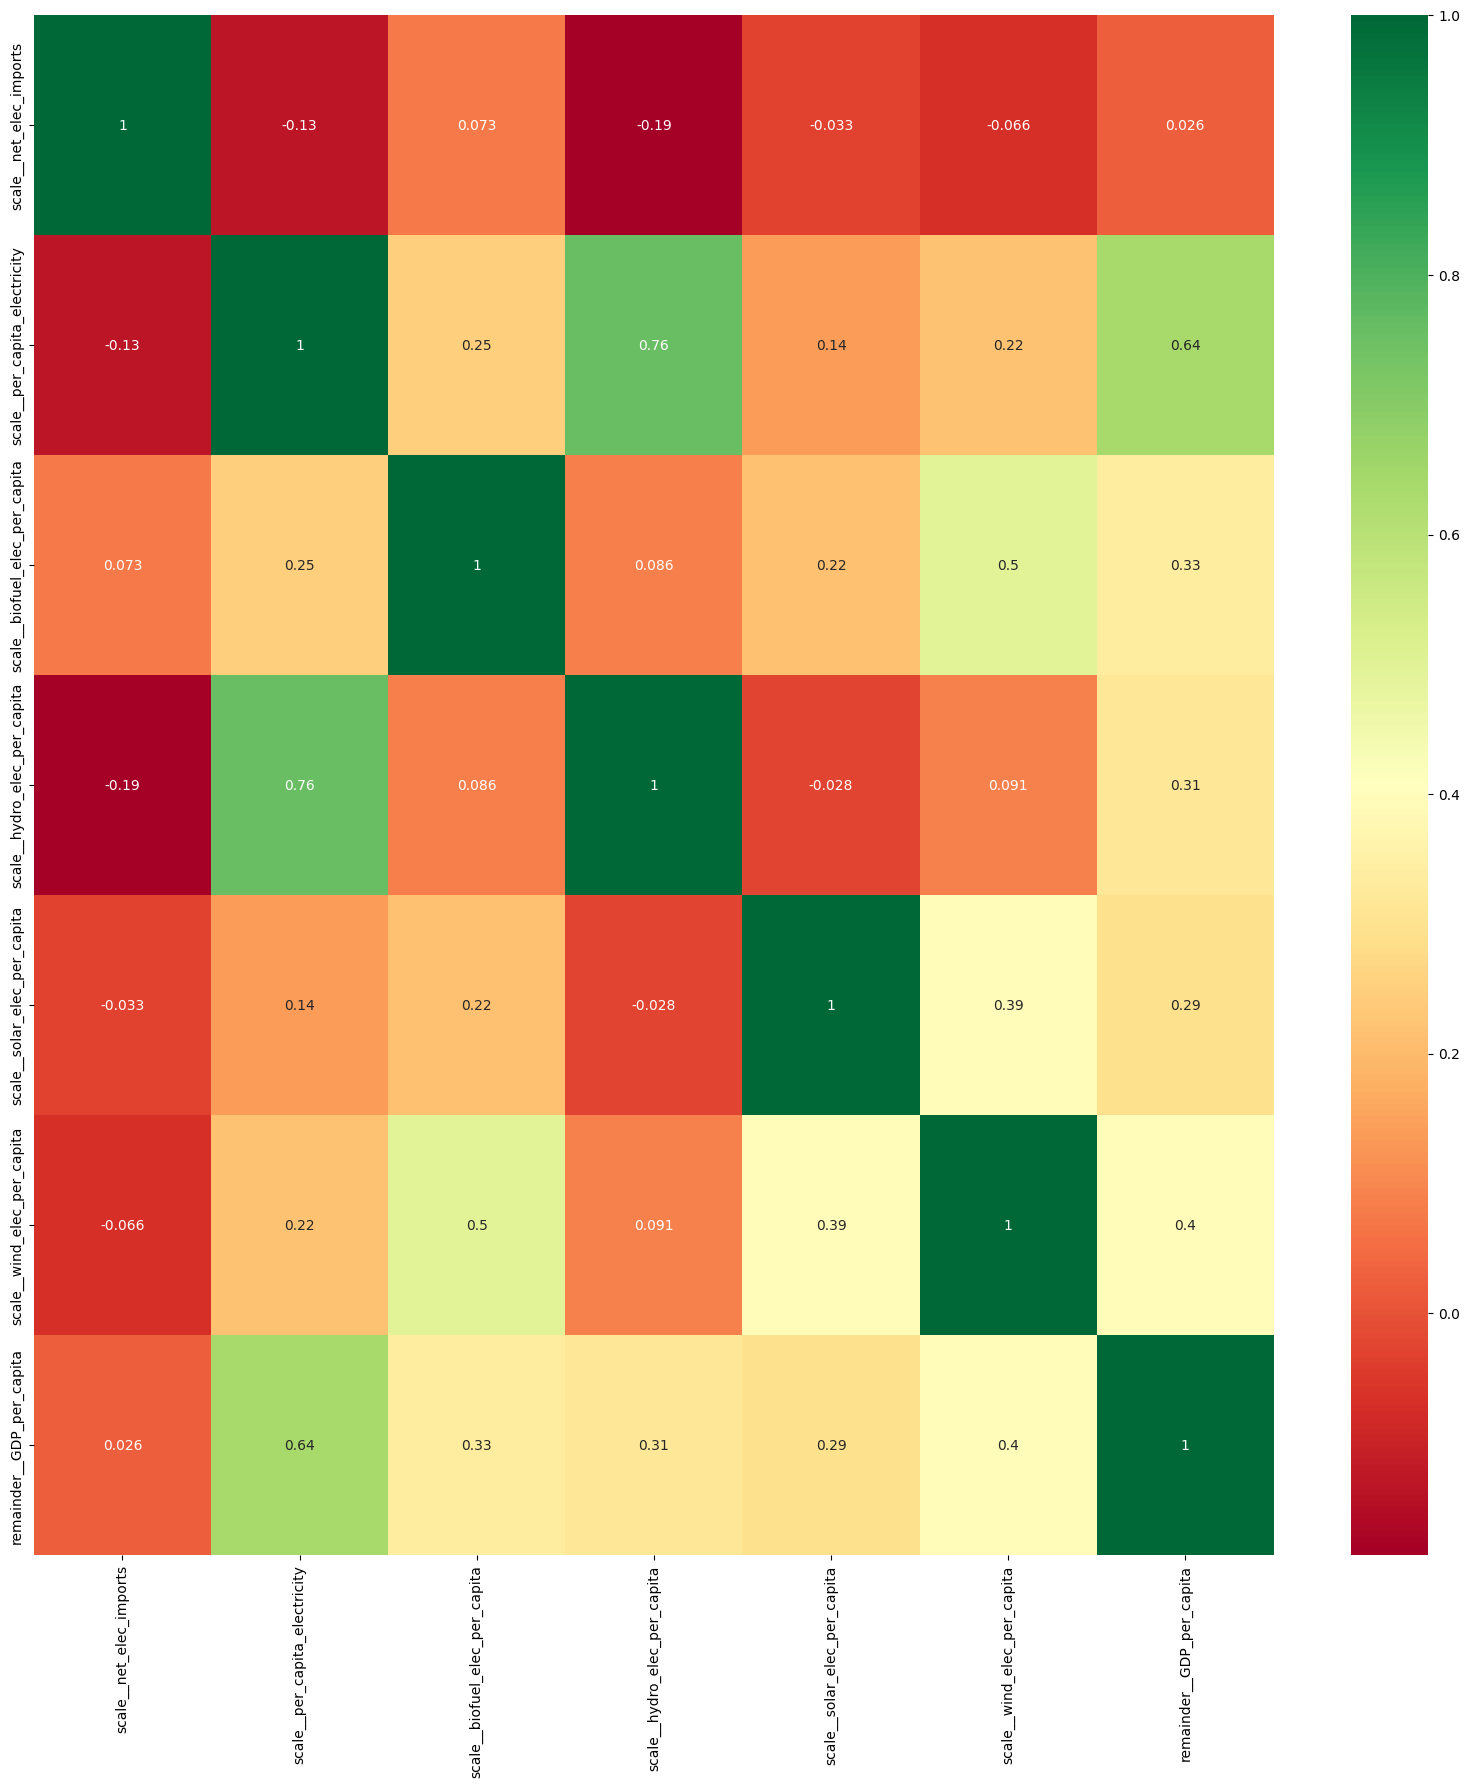

In [7]:
corrmat = full_cleaned_final[['scale__net_elec_imports',
                        'scale__per_capita_electricity', 
                        'scale__biofuel_elec_per_capita',
                        'scale__hydro_elec_per_capita', 
                        'scale__solar_elec_per_capita',
                        'scale__wind_elec_per_capita', 
                        'remainder__GDP_per_capita'
                       ]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_cleaned_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#full_cleaned_final['scale__all_renewable'] = np.array(full_cleaned_final['scale__biofuel_electricity'])-np.array(full_cleaned_final['scale__wind_electricity'])+2*np.array(full_cleaned_final['scale__gas_production'])

#full_cleaned_final_test['scale__all_renewable'] = np.array(full_cleaned_final_test['scale__biofuel_electricity'])-np.array(full_cleaned_final_test['scale__wind_electricity'])+2*np.array(full_cleaned_final_test['scale__gas_production'])

In [9]:
full_cleaned_final.columns

Index(['Unnamed: 0', 'scale__net_elec_imports',
       'scale__per_capita_electricity', 'scale__biofuel_elec_per_capita',
       'scale__hydro_elec_per_capita', 'scale__solar_elec_per_capita',
       'scale__wind_elec_per_capita', 'remainder__country', 'remainder__year',
       'remainder__GDP_per_capita'],
      dtype='object')

In [10]:
full_cleaned_final1 = full_cleaned_final.drop(columns=['Unnamed: 0','remainder__year','remainder__country'])

In [11]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   scale__net_elec_imports         3273 non-null   float64
 1   scale__per_capita_electricity   3273 non-null   float64
 2   scale__biofuel_elec_per_capita  3273 non-null   float64
 3   scale__hydro_elec_per_capita    3273 non-null   float64
 4   scale__solar_elec_per_capita    3273 non-null   float64
 5   scale__wind_elec_per_capita     3273 non-null   float64
 6   remainder__GDP_per_capita       3273 non-null   float64
dtypes: float64(7)
memory usage: 179.1 KB


In [12]:
full_cleaned_final1['remainder__GDP_per_capita']

0        1249.612148
1        1768.251890
2        3283.377863
3       31657.763247
4        1276.760315
            ...     
3268    16609.722783
3269    48301.528960
3270    10857.338149
3271      595.663785
3272     6366.592213
Name: remainder__GDP_per_capita, Length: 3273, dtype: float64

## Statistical inference

### Impact of Biofuel in GDP_Per_capita

In [13]:
# Checking the R-sqaured
#model1.rsquared

In [14]:
#model1.summary()

### Impact of biofuel_elec_per_capita on GDP

In [15]:
model_bio = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_elec_per_capita', data=full_cleaned_final1).fit()

print(model_bio.params)
model_bio.rsquared

Intercept                         11493.503399
scale__biofuel_elec_per_capita    72250.192320
dtype: float64


0.11184075696786966

### Impact of Oil_production in GDP_Per_capita

###  Net imports

In [16]:
model_elec_imports = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__net_elec_imports', data=full_cleaned_final1).fit()

print(model_elec_imports.params)
model_elec_imports.rsquared


Intercept                  9292.188241
scale__net_elec_imports    7783.007308
dtype: float64


0.0006991081480978156

### Fossil

### Gas production

### Impact of hydro_electricity on GDP

### Impact of hydro_elec_per_capita on GDP

In [17]:
model__hydro_elec_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_elec_per_capita', data=full_cleaned_final1).fit()

print(model__hydro_elec_per_capita.params)
model__hydro_elec_per_capita.rsquared

Intercept                       11950.871961
scale__hydro_elec_per_capita    68666.300669
dtype: float64


0.09909422397652379

### Impact of Solar_electricity on GDP

### Impact of solar_elec_per_capita on GDP

In [18]:
model_solar_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_elec_per_capita', data=full_cleaned_final).fit()

print(model_solar_per_capita.params)
model_solar_per_capita.rsquared
model_solar_per_capita.summary()

Intercept                       11871.344961
scale__solar_elec_per_capita    77299.310570
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.087
Model:                                   OLS   Adj. R-squared:                  0.087
Method:                        Least Squares   F-statistic:                     311.1
Date:                       Sat, 10 Jun 2023   Prob (F-statistic):           1.36e-66
Time:                               17:39:24   Log-Likelihood:                -36618.
No. Observations:                       3273   AIC:                         7.324e+04
Df Residuals:                           3271   BIC:                         7.325e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.187e+04    318.854     37.231      0.000    1.12e+04    1.25e+04
scale__solar_elec_per_capita   7.73e+04   4382.214     17.639      0.000    6.87e+04    8.59e+04
==============================================================================
Omnibus:                     1497.340   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6932.095
Skew:                           2.239   Prob(JB):                         0.00
Kurtosis:                       8.548   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Wind_electricity on GDP

### Impact of wind_elec_per_capita on GDP

In [19]:
model_wind_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_elec_per_capita', data=full_cleaned_final).fit()
print(model_wind_per_capita.params)
model_wind_per_capita.rsquared

Intercept                      11346.642029
scale__wind_elec_per_capita    75453.530332
dtype: float64


0.1571664566739427

### Impact of biofuel and wind_electricity on GDP

In [20]:
model_perCapita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__per_capita_electricity', data=full_cleaned_final).fit()

print(model_perCapita.params)
model_perCapita.rsquared

Intercept                          5548.725837
scale__per_capita_electricity    123139.516355
dtype: float64


0.40959534928529384

## Training an OLS model

In [21]:
X_train = full_cleaned_final[['scale__net_elec_imports','scale__hydro_elec_per_capita','scale__biofuel_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita',
                              'scale__per_capita_electricity']]
y_train = full_cleaned_final[['remainder__GDP_per_capita']]

X_test = full_cleaned_final_test[['scale__net_elec_imports','scale__hydro_elec_per_capita','scale__biofuel_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita',
                                  'scale__per_capita_electricity']]
y_test = full_cleaned_final_test[['remainder__GDP_per_capita']]
#'scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity',

In [22]:
print(X_train.shape)
np.linalg.matrix_rank(X_train)

(3273, 6)


6

### Train on OLS model

In [23]:
model = sm.OLS(y_train,X_train).fit()

In [24]:
# Your predictions
y_pred = model.predict(X_test)

In [25]:
y_pred=pd.DataFrame(y_pred)


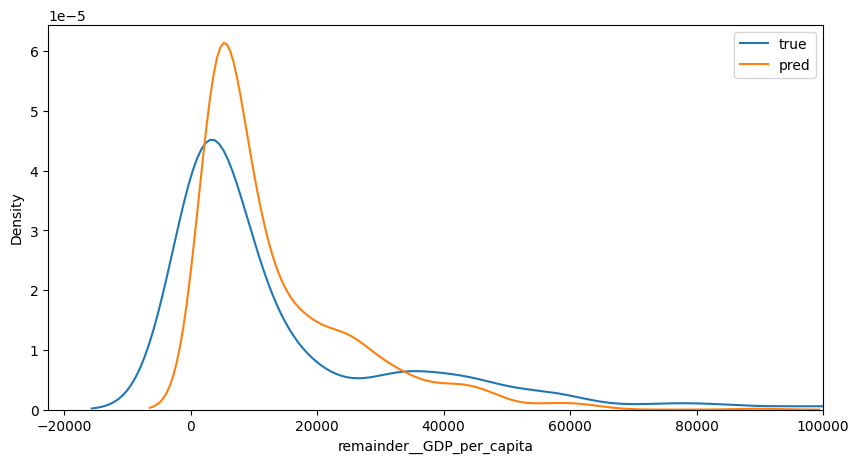

In [26]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_test['remainder__GDP_per_capita'], label = 'true')
sns.kdeplot(y_pred[0], label = 'pred')
plt.xlim(xmax=10e4)
plt.legend()

## Train with a linear regression model

In [27]:
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.score(X_test,y_test)

0.5707701753030283

# Trying Ridge

In [51]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score



Poly_model = PolynomialFeatures(degree=3)
ridge_model = Ridge(alpha=0.1)  # alpha controls the strength of the regularization

# Create a pipeline to combine the polynomial features and the Ridge model
pipeline = make_pipeline(Poly_model, ridge_model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
print(score, 'test_score')

y_pred = pipeline.predict(X_train)

r2_score_train=r2_score(y_train,y_pred)
print(r2_score_train, 'train score')

0.6280604683858013 test_score
0.6268699653839718 train score


In [52]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.62609861 0.64916064 0.62666029 0.56598197 0.56129819]
Mean cross-validation score: 0.6058399394968117
Standard deviation of cross-validation scores: 0.03547733906793666


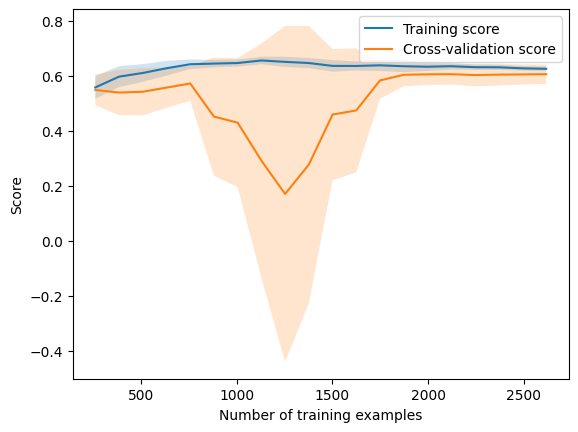

In [101]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 20)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Elastic Net

In [104]:
from sklearn.linear_model import ElasticNet

Poly_model = PolynomialFeatures(degree=4)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.4)  # alpha controls the strength of the regularization, l1_ratio controls the balance between L1 and L2 regularization

# Create a pipeline to combine the polynomial features and the ElasticNet model
pipeline = make_pipeline(Poly_model, elasticnet_model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
score

0.1935370920610685

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Create a decision tree regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model to the training data
tree.fit(X_train, y_train)

# Evaluate the model on the test data
score = tree.score(X_test, y_test)
score

0.7379974406782549

In [79]:
# Evaluate the model on the training data
y_train_pred = tree.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = tree.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training set R^2 score:", r2_train)
print("Test set R^2 score:", r2_test)

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_test_pred)

print("Test set mean absolute error:", mae)
print("Test set mean squared error:", mse)

Training set R^2 score: 0.7756314643895532
Test set R^2 score: 0.7379974406782549
Test set mean absolute error: 5094.498547907868
Test set mean squared error: 107209452.20493425


In [100]:
pd.DataFrame(y).describe()

,remainder__GDP_per_capita
count,3273.000000
mean,13470.902168
std,18298.489875
min,255.100291
25%,1711.290666
50%,5262.183808
75%,17662.242842
max,112417.878458


### Train on Polynomial linear Regression model

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Poly_model = PolynomialFeatures(degree=3)
X_poly = Poly_model.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)


y_pred = model.predict(X_poly)


r2_score_train=r2_score(y_train,y_pred)
print(f'r2_score test: {r2_score_train}')

X_test_poly = Poly_model.transform(X_test)

y_test_pred = model.predict(X_test_poly)
r2_score_test =r2_score(y_test,y_test_pred)
print(f'r2_score test: {r2_score_test}')

r2_score test: 0.7235946272294715
r2_score test: 0.6736376726234099


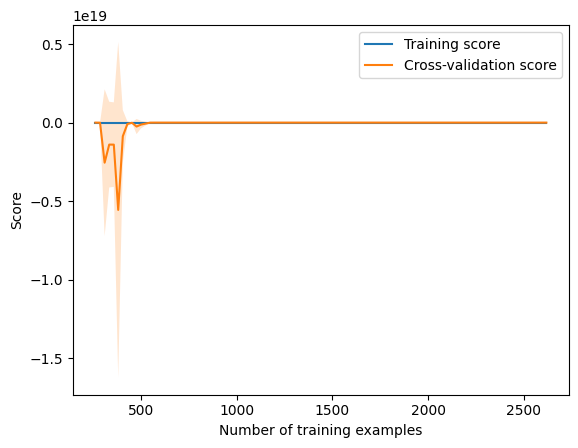

In [98]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 100)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_poly, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### Root mean square error

In [64]:
import math
MSE = np.square(np.subtract(y_test,y_test_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

12289.193306773763


/tmp/ipykernel_12331/603380909.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  RMSE = math.sqrt(MSE)


### Mean absolute error

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_test_pred)


6410.523655729831

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [67]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)

                        variables       VIF
0         scale__net_elec_imports  1.597067
1    scale__hydro_elec_per_capita  2.665174
2  scale__biofuel_elec_per_capita  1.535174
3    scale__solar_elec_per_capita  1.332547
4     scale__wind_elec_per_capita  1.641873
5   scale__per_capita_electricity  3.828396


## Same process with the base model

In [69]:
full_cleaned_base=pd.read_csv('full_cleaned_final.csv')

In [70]:
modelb1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_base).fit()

print(modelb1.params)

PatsyError: Error evaluating factor: NameError: name 'scale__biofuel_electricity' is not defined
    remainder__GDP_per_capita ~ scale__biofuel_electricity
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [71]:
modelb2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_base).fit()

print(modelb2.params)

PatsyError: Error evaluating factor: NameError: name 'scale__hydro_electricity' is not defined
    remainder__GDP_per_capita ~ scale__hydro_electricity
                                ^^^^^^^^^^^^^^^^^^^^^^^^